In [5]:
import os
import pandas as pd
import requests

r= requests.get('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
PATH = r'/Users/owy1/codefellows/401/machine-learning/blueprint/lesson1/'
with open(PATH+'/iris.data','w') as f:
    f.write(r.text)
os.chdir(PATH)
df = pd.read_csv(PATH+'iris.data', names=['sepal length', 'sepal width',
   'petal length', 'petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.iloc[:4,:2] #data slicing

,sepal length,sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1


In [4]:
df.loc[:4, [x for x in df.columns if 'width' in x]] #select 'width' columns

,sepal width,petal width
0,3.5,0.2
1,3.0,0.2
2,3.2,0.2
3,3.1,0.2
4,3.6,0.2


In [5]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
virginica = df[df['class']=='Iris-virginica'].reset_index(drop=True) #new dataframe index starts at 0
virginica[:5] #list first 5 rows of data

,sepal length,sepal width,petal length,petal width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,5.8,2.7,5.1,1.9,Iris-virginica
2,7.1,3.0,5.9,2.1,Iris-virginica
3,6.3,2.9,5.6,1.8,Iris-virginica
4,6.5,3.0,5.8,2.2,Iris-virginica


In [7]:
df[df['class']=='Iris-virginica'].count()

sepal length    50
sepal width     50
petal length    50
petal width     50
class           50
dtype: int64

In [8]:
df[(df['class']=='Iris-virginica') & (df['petal width']>2.2)]

,sepal length,sepal width,petal length,petal width,class
100,6.3,3.3,6.0,2.5,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
118,7.7,2.6,6.9,2.3,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
135,7.7,3.0,6.1,2.3,Iris-virginica
136,6.3,3.4,5.6,2.4,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica


In [9]:
df.describe(percentiles=[0.25,0.50,0.90, 0.95])

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
90%,6.900000,3.610000,5.800000,2.200000
95%,7.255000,3.800000,6.100000,2.300000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.corr(method="spearman")

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.159457,0.881386,0.834421
sepal width,-0.159457,1.000000,-0.303421,-0.277511
petal length,0.881386,-0.303421,1.000000,0.936003
petal width,0.834421,-0.277511,0.936003,1.000000


In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import numpy as np

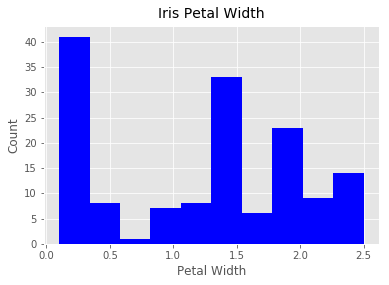

In [12]:
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(df['petal width'], color='blue')
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Petal Width', fontsize=12)
plt.title('Iris Petal Width', fontsize=14, y=1.01)

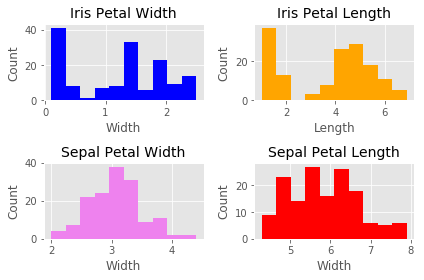

In [13]:
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax[0][0].hist(df['petal width'], color='blue');
ax[0][0].set_ylabel('Count', fontsize=12)
ax[0][0].set_xlabel('Width', fontsize=12)
ax[0][0].set_title('Iris Petal Width', fontsize=14, y=1.01)
ax[0][1].hist(df['petal length'], color='orange');
ax[0][1].set_ylabel('Count', fontsize=12)
ax[0][1].set_xlabel('Length', fontsize=12)
ax[0][1].set_title('Iris Petal Length', fontsize=14, y=1.01)
ax[1][0].hist(df['sepal width'], color='violet');
ax[1][0].set_ylabel('Count', fontsize=12)
ax[1][0].set_xlabel('Width', fontsize=12)
ax[1][0].set_title('Sepal Petal Width', fontsize=14, y=1.01)
ax[1][1].hist(df['sepal length'], color='red');
ax[1][1].set_ylabel('Count', fontsize=12)
ax[1][1].set_xlabel('Width', fontsize=12)
ax[1][1].set_title('Sepal Petal Length', fontsize=14, y=1.01)
plt.tight_layout()

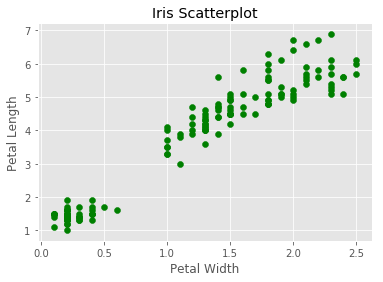

In [14]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(df['petal width'], df['petal length'],color='green')
ax.set_ylabel('Petal Length', fontsize=12)
ax.set_xlabel('Petal Width', fontsize=12)
ax.set_title('Iris Scatterplot')

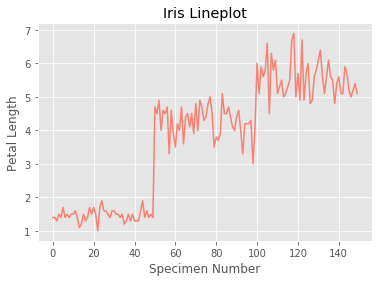

In [15]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(df['petal length'],color='salmon')
ax.set_ylabel('Petal Length', fontsize=12)
ax.set_xlabel('Specimen Number', fontsize=12)
ax.set_title('Iris Lineplot')

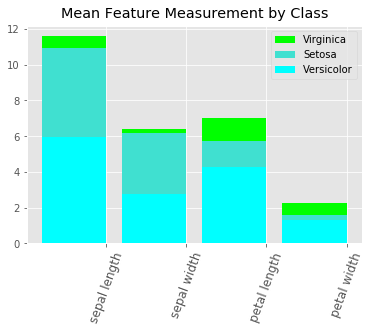

In [16]:
fig, ax = plt.subplots(figsize=(6,4))
bar_width = 0.8
labels = [x for x in df.columns if 'length' in x or 'width' in x]
ver_y = [df[df['class']=='Iris-versicolor'][x].mean() for x in labels]
vir_y = [df[df['class']=='Iris-virginica'][x].mean() for x in labels]
set_y = [df[df['class']=='Iris-setosa'][x].mean() for x in labels]
x = np.arange(len(labels))
ax.bar(x, vir_y, bar_width, bottom=set_y, color='lime')
ax.bar(x, set_y, bar_width, bottom=ver_y, color='turquoise')
ax.bar(x, ver_y, bar_width, color='cyan')
ax.set_xticklabels(labels, rotation=70, fontsize=12)
ax.set_xticks(x+(bar_width/2))
ax.set_title('Mean Feature Measurement by Class', y=1.01)
ax.legend(['Virginica', 'Setosa', 'Versicolor'])

In [17]:
df['class'] = df['class'].map({'Iris-setosa': 'SET', 'Iris-virginica':
   'VIR', 'Iris-versicolor': 'VER'})
df[:5]

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,SET
1,4.9,3.0,1.4,0.2,SET
2,4.7,3.2,1.3,0.2,SET
3,4.6,3.1,1.5,0.2,SET
4,5.0,3.6,1.4,0.2,SET


In [18]:
df['wide petal'] = df['petal width'].apply(lambda v: 1 if v >= 1.3 else 0)
df[:5]

,sepal length,sepal width,petal length,petal width,class,wide petal
0,5.1,3.5,1.4,0.2,SET,0
1,4.9,3.0,1.4,0.2,SET,0
2,4.7,3.2,1.3,0.2,SET,0
3,4.6,3.1,1.5,0.2,SET,0
4,5.0,3.6,1.4,0.2,SET,0


In [19]:
df['petal area'] = df.apply(lambda r: r['petal length'] * r['petal width'],
   axis=1)
df[:10]

,sepal length,sepal width,petal length,petal width,class,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28
5,5.4,3.9,1.7,0.4,SET,0,0.68
6,4.6,3.4,1.4,0.3,SET,0,0.42
7,5.0,3.4,1.5,0.2,SET,0,0.30
8,4.4,2.9,1.4,0.2,SET,0,0.28
9,4.9,3.1,1.5,0.1,SET,0,0.15


In [20]:
df.groupby('class').mean()

,sepal length,sepal width,petal length,petal width,wide petal,petal area
class,,,,,,
SET,5.006,3.418,1.464,0.244,0.0,0.3628
VER,5.936,2.770,4.260,1.326,0.7,5.7204
VIR,6.588,2.974,5.552,2.026,1.0,11.2962


In [21]:
df.groupby('class').describe()

petal area                                                         \
           count     mean       std   min     25%     50%    75%    max   
class                                                                     
SET         50.0   0.3628  0.183248  0.11  0.2650   0.300   0.42   0.96   
VER         50.0   5.7204  1.368403  3.30  4.8600   5.615   6.75   8.64   
VIR         50.0  11.2962  2.157412  7.50  9.7175  11.445  12.79  15.87   

      petal length        ...  sepal width      wide petal                     \
             count   mean ...          75%  max      count mean      std  min   
class                     ...                                                   
SET           50.0  1.464 ...        3.675  4.4       50.0  0.0  0.00000  0.0   
VER           50.0  4.260 ...        3.000  3.4       50.0  0.7  0.46291  0.0   
VIR           50.0  5.552 ...        3.175  3.8       50.0  1.0  0.00000  1.0   

                           
       25%  50%  75%  max  
class                      
SET    0.0  0.0  0.0  0.0  
VER    0.0  1.0  1.0  1.0  
VIR    1.0  1.0  1.0  1.0  

[3 rows x 48 columns]

In [22]:
import statsmodels.api as sm
y = df['sepal length'][:50]
x = df['sepal width'][:50]
X = sm.add_constant(x)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Fri, 29 Sep 2017   Prob (F-statistic):           4.75e-10
Time:                        01:05:27   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

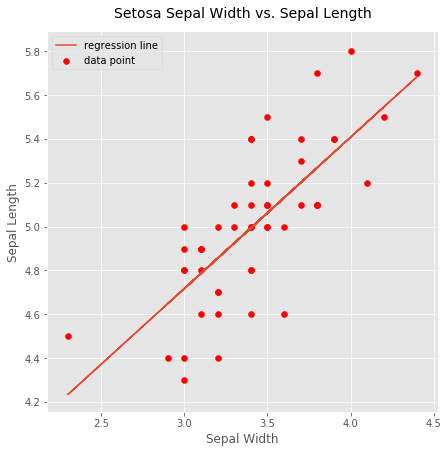

In [23]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier(max_depth=5, n_estimators=10)

X = df.iloc[:,:4]
y = df.iloc[:,4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf

,predicted,actual,correct
0,VER,VER,1
1,SET,SET,1
2,VER,VER,1
3,VIR,VIR,1
4,SET,SET,1
5,VER,VER,1
6,VER,VER,1
7,VIR,VIR,1
8,VIR,VIR,1
9,VER,VER,1


In [26]:
rf['correct'].sum()/rf['correct'].count()

0.9555555555555556

([<matplotlib.axis.XTick at 0x110bc6400>,
 <a list of 4 Text xticklabel objects>)

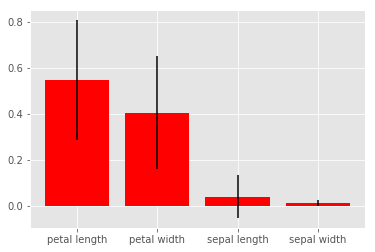

In [33]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz,key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]

plt.bar(range(len(f_importances)), imps, color="red", yerr = errs, align="center")
plt.xticks(range(len(f_importances)), labels)

In [34]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

clf = OneVsRestClassifier(SVC(kernel='linear'))

X = df.iloc[:,:4]
y = np.array(df.iloc[:,4]).astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

rf = pd.DataFrame(list(zip(y_pred, y_test)), columns=['predicted', 'actual'])
rf['correct'] = rf.apply(lambda r: 1 if r['predicted'] == r['actual'] else 0, axis=1)
rf


,predicted,actual,correct
0,VER,VER,1
1,SET,SET,1
2,VER,VER,1
3,VER,VER,1
4,SET,SET,1
5,VIR,VIR,1
6,VIR,VER,0
7,SET,SET,1
8,VIR,VIR,1
9,SET,SET,1


In [35]:
rf['correct'].sum()/rf['correct'].count()

0.8666666666666667